In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tifffile import imread, imsave

In [32]:
path_mask = 'your/pathname/for/the/masks'

files = sorted(glob(path_mask+'/*.tif'))
print(len(files))
print(files[0])

6
/Users/lucrezia/Desktop/StarDistData/ELISA/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/fish2_nasal_15-75z_corrected.tif


In [33]:
labels = sorted(glob(path_mask+'/labels/*.csv'))
print(labels[0])
masks = list(map(imread, files))
print(len(labels))

/Users/lucrezia/Desktop/StarDistData/ELISA/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/labels/fish2_nasal_15-75z_corrected.csv
6


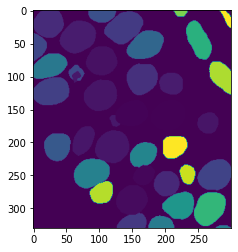

In [7]:
plt.imshow(masks[0][10])
plt.show()

In [10]:
df = pd.read_csv(labels[0], sep=';')
print(df.head())

   Unnamed: 0  label class
0           0     26   RGC
1           1     33   NaN
2           2     34   RGC
3           3     38   RGC
4           4     40   RGC


In [19]:
classes = {'RGC': 1, 'BC': 2, 'PR': 3, 'AC': 4, 'HC': 5, 'LENS': 6, 'RPE': 7, np.nan : 8}

new_classes = []
for el in (df['class']):
    new_classes.append(classes[el])

print(new_classes)

converted_classes = df['class'].map(classes)
print(converted_classes)

[1, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 6, 8, 1, 1, 1, 1, 4, 1, 4, 6, 6, 4, 1, 1, 6, 1, 4, 6, 1, 8, 1, 4, 1, 8, 1, 1, 6, 6, 1, 1, 4, 1, 1, 1, 1, 1, 1, 6, 6, 6]
0      1
1      8
2      1
3      1
4      1
      ..
153    1
154    1
155    6
156    6
157    6
Name: class, Length: 158, dtype: int64


In [28]:
ids = {k:v for k,v in zip(df['label'], converted_classes)}
ids[0] = 0
print(ids)

{26: 1, 33: 8, 34: 1, 38: 1, 40: 1, 51: 1, 68: 1, 120: 1, 134: 1, 143: 1, 172: 1, 176: 1, 184: 1, 206: 1, 218: 1, 225: 1, 233: 1, 235: 1, 238: 1, 240: 1, 242: 1, 255: 1, 258: 1, 275: 1, 296: 4, 299: 1, 305: 1, 307: 1, 373: 1, 405: 1, 427: 1, 462: 1, 467: 1, 484: 1, 504: 1, 517: 1, 522: 1, 527: 1, 550: 1, 554: 1, 578: 1, 618: 1, 644: 1, 652: 1, 666: 1, 683: 1, 694: 1, 711: 1, 768: 1, 774: 1, 794: 1, 797: 1, 805: 1, 809: 1, 815: 1, 849: 1, 860: 1, 894: 1, 895: 1, 904: 1, 911: 1, 917: 1, 924: 1, 960: 1, 981: 1, 984: 1, 1042: 1, 1077: 1, 1125: 4, 1160: 1, 1170: 1, 1176: 1, 1180: 1, 1194: 1, 1241: 1, 1253: 1, 1305: 1, 1331: 1, 1337: 1, 1358: 4, 1367: 1, 1374: 1, 1407: 1, 1439: 1, 1531: 1, 1553: 1, 1559: 1, 1567: 1, 1579: 1, 1624: 1, 1646: 1, 1676: 1, 1678: 1, 1699: 1, 1725: 1, 1746: 1, 1762: 1, 1783: 1, 1787: 1, 1788: 1, 1819: 1, 1820: 1, 1825: 1, 1836: 1, 1845: 4, 1856: 1, 1906: 1, 1957: 1, 1967: 1, 1968: 1, 2060: 4, 2084: 1, 2125: 1, 2185: 1, 2195: 1, 2229: 1, 2363: 4, 2508: 1, 2577: 6, 2

In [29]:
print(len(df), len(ids))

158 159


In [35]:
mask = masks[0]
m = mask.flatten()
print(m)
new_mask = []
for i in range(len(m)):
    if m[i] not in ids:
        new_mask.append(8)
    else:
        new_mask.append(ids[m[i]])
    
print(new_mask)

[652 652 652 ...   0   0   0]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [43]:
print(masks[0].shape)

new_mask = np.asarray(new_mask)
new_mask = np.reshape(new_mask, masks[0].shape)
print(new_mask.shape)

(61, 330, 300)
(61, 330, 300)


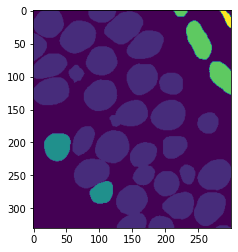

In [44]:
plt.imshow(new_mask[10])
plt.show()

In [45]:
import napari

viewer = napari.view_image(new_mask)


In [62]:
viewer = napari.view_labels(new_mask, scale=(2, 1, 1))

In [54]:
# sava data as json file
import json
with open(path_mask+'/labels/'+os.path.basename(labels[0])[:-3]+'json', 'w') as fp:
    json_ids = json.dump(ids, fp)
    

In [55]:
!ls


README.md           Visualization.ipynb images              masks


In [56]:
!cd masks


In [60]:
path_mask

'/Users/lucrezia/Desktop/StarDistData/ELISA/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected'

In [61]:
!ls /Users/lucrezia/Desktop/StarDistData/ELISA/project9_classification_of_neuronal_types/masks/complete_masks/manually_corrected/labels/

fish2_nasal_15-75z_corrected.csv    fish2_temporal_10-70z_corrected.csv
fish2_nasal_15-75z_corrected.json   fish2_temporal_20-81z_corrected.csv
fish2_nasal_20-80z_corrected.csv    fish2_temporal_5-65z_corrected.csv
fish2_nasal_25-85z_corrected.csv
